In [1]:
# Load data and split to train & validation set (8:2)

import os
from sklearn.model_selection import train_test_split

# Set the path for the Caltech-101 dataset
data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\101_ObjectCategories'

classes = os.listdir(data_dir)

image_paths = []

for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    cls_images = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir)]
    image_paths.extend(cls_images)

image_labels = [os.path.basename(os.path.dirname(img)) for img in image_paths]

# Split to train & validation set (8:2)
train_paths, val_paths, train_labels, val_labels = train_test_split(image_paths, image_labels, test_size=0.2, random_state=42)

# Create and route directories for train and validation data
train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

for i in range(len(train_paths)):
    cls = train_labels[i]
    img = os.path.basename(train_paths[i])
    dest_dir = os.path.join(train_data_dir, cls)
    os.makedirs(dest_dir, exist_ok=True)
    os.replace(train_paths[i], os.path.join(dest_dir, img))

for i in range(len(val_paths)):
    cls = val_labels[i]
    img = os.path.basename(val_paths[i])
    dest_dir = os.path.join(val_data_dir, cls)
    os.makedirs(dest_dir, exist_ok=True)
    os.replace(val_paths[i], os.path.join(dest_dir, img))

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

In [1]:
# Based ResNet-50 (model_A)

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load data
train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

# Set image size (batch=64)
img_width, img_height = 224, 224
batch_size = 64

# Set data generator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

# Load train & validation data to generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Import ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Configure model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

# Train model (epochs=10)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

# Evaluate model
val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

# Learning log output
print(history.history)


Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.


Epoch 1/10


114/114 [==============================] - 266s 2s/step - loss: 2.4244 - accuracy: 0.4662 - top_k_categorical_accuracy: 0.6499 - val_loss: 5.9348 - val_accuracy: 0.0463 - val_top_k_categorical_accuracy: 0.1144
Epoch 2/10
114/114 [==============================] - 261s 2s/step - loss: 1.0732 - accuracy: 0.7070 - top_k_categorical_accuracy: 0.8981 - val_loss: 5.7498 - val_accuracy: 0.0552 - val_top_k_categorical_accuracy: 0.0776
Epoch 3/10
114/114 [==============================] - 261s 2s/step - loss: 0.7083 - accuracy: 0.7991 - top_k_categorical_accuracy: 0.9497 - val_loss: 11.8906 - val_accuracy: 0.0530 - val_top_k_categorical_accuracy: 0.0815
Epoch 4/10
114/114 [==============================] - 260s 2s/step - loss: 0.5342 - accuracy: 0.8449 - top_k_categorical_accuracy: 0.9675 - val_loss: 5.5610 - val_accuracy: 0.0804 - val_top_k_categorical_accuracy: 0.1825
Epoch 5/10
114/114 [==

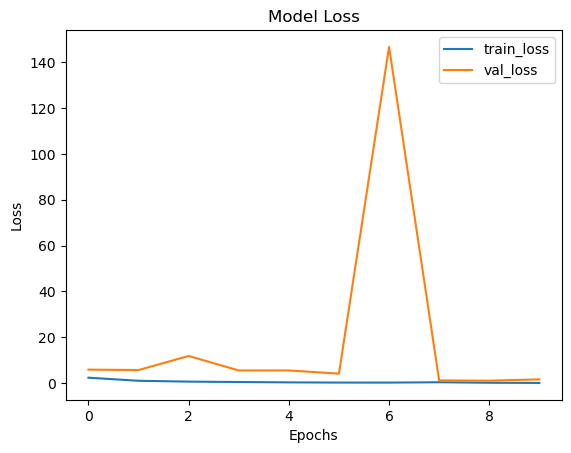

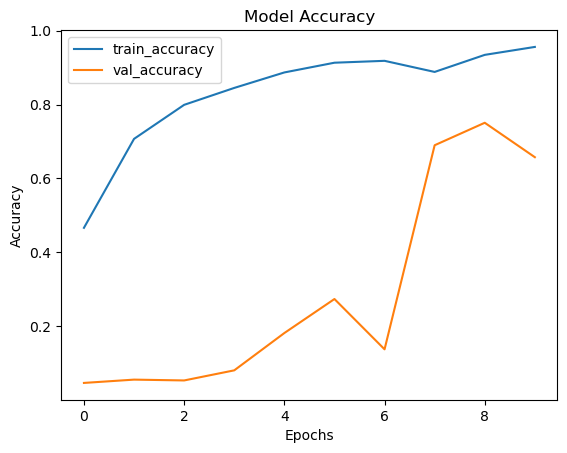

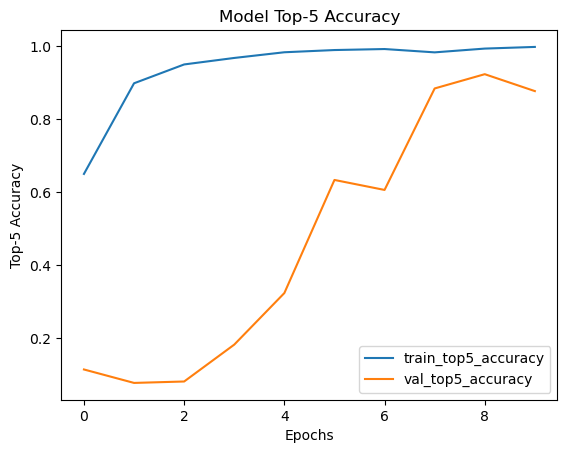

In [2]:
# Visualization Model_A learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [3]:
# Resnet-50_B

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Modify the block
for layer in model.layers:
    if 'conv1' in layer.name:  # If it is 1st conv layer
        layer.strides = (2, 2)  # Change stride to 2x2
    elif 'conv2_block1_0_conv' in layer.name:  # If it is 2nd conv layer
        layer.strides = (1, 1)  # Change stride to 1x1

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 265s 2s/step - loss: 2.2965 - accuracy: 0.4810 - top_k_categorical_accuracy: 0.6831 - val_loss: 5.2648 - val_accuracy: 0.0536 - val_top_k_categorical_accuracy: 0.0954
Epoch 2/10
114/114 [==============================] - 260s 2s/step - loss: 1.1028 - accuracy: 0.7070 - top_k_categorical_accuracy: 0.9013 - val_loss: 5.4935 - val_accuracy: 0.0541 - val_top_k_categorical_accuracy: 0.0904
Epoch 3/10
114/114 [==============================] - 260s 2s/step - loss: 0.6787 - accuracy: 0.8075 - top_k_categorical_accuracy: 0.9542 - val_loss: 6.7779 - val_accuracy: 0.0307 - val_top_k_categorical_accuracy: 0.1038
Epoch 4/10
114/114 [==============================] - 260s 2s/step - loss: 0.4744 - accuracy: 0.8573 - top_k_categorical_accuracy: 0.9744 - val_loss: 9.0291 - val_accuracy: 0.0558 - val_top_k_categorical_accuracy: 0.1568
Epoch 5/10
114/114 [========

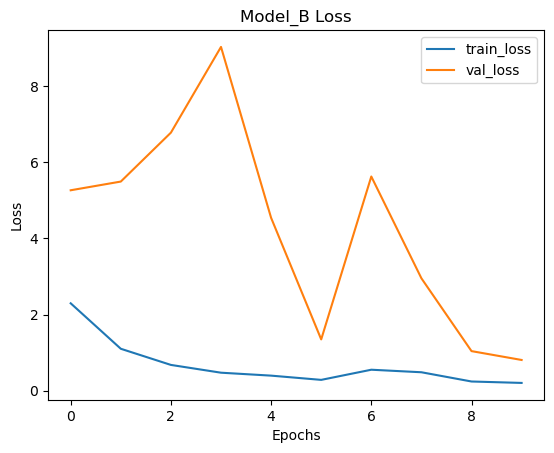

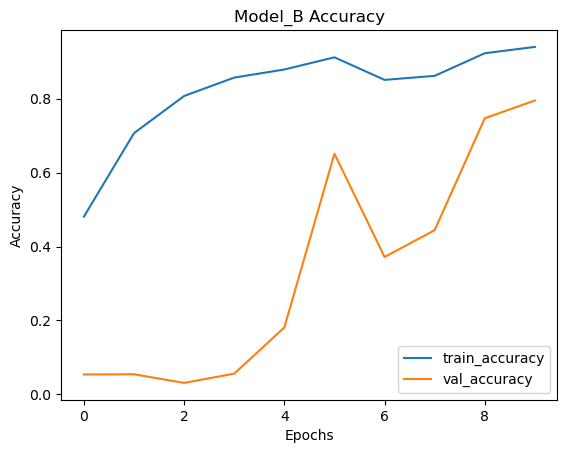

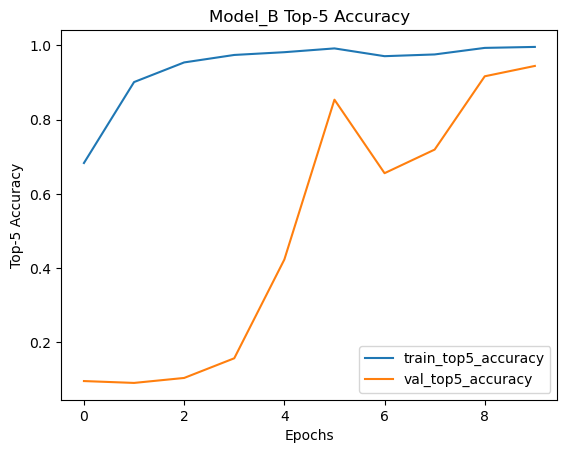

In [4]:
# Visualization Model_B learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_B Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_B Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_B Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [37]:
# ResNet-50_C

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False)

x = base_model.output

# Add three 3x3 conv layer & MaxPooling layer
for _ in range(3):
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 302s 3s/step - loss: 3.3745 - accuracy: 0.3027 - top_k_categorical_accuracy: 0.3944 - val_loss: 9.0075 - val_accuracy: 0.0246 - val_top_k_categorical_accuracy: 0.0597
Epoch 2/10
114/114 [==============================] - 265s 2s/step - loss: 2.6118 - accuracy: 0.4073 - top_k_categorical_accuracy: 0.5623 - val_loss: 4.6568 - val_accuracy: 0.0547 - val_top_k_categorical_accuracy: 0.0898
Epoch 3/10
114/114 [==============================] - 263s 2s/step - loss: 2.1976 - accuracy: 0.4655 - top_k_categorical_accuracy: 0.6569 - val_loss: 6.0684 - val_accuracy: 0.0776 - val_top_k_categorical_accuracy: 0.1607
Epoch 4/10
114/114 [==============================] - 262s 2s/step - loss: 1.8840 - accuracy: 0.5248 - top_k_categorical_accuracy: 0.7241 - val_loss: 5.0468 - val_accuracy: 0.0251 - val_top_k_categorical_accuracy: 0.0988
Epoch 5/10
114/114 [========

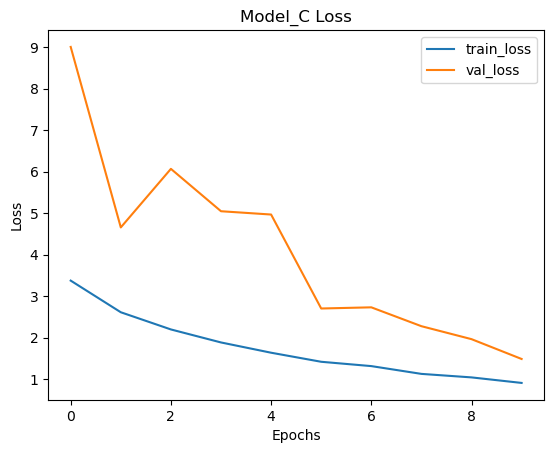

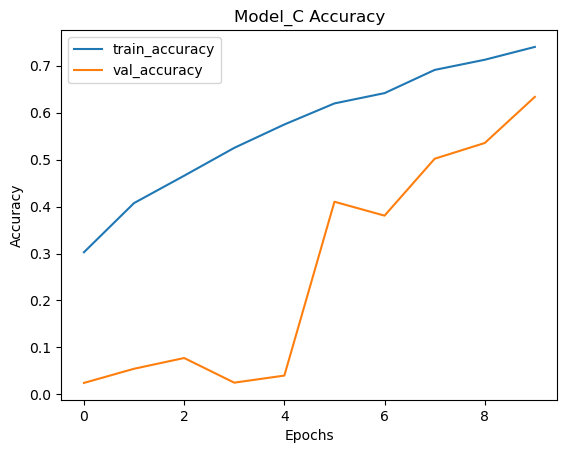

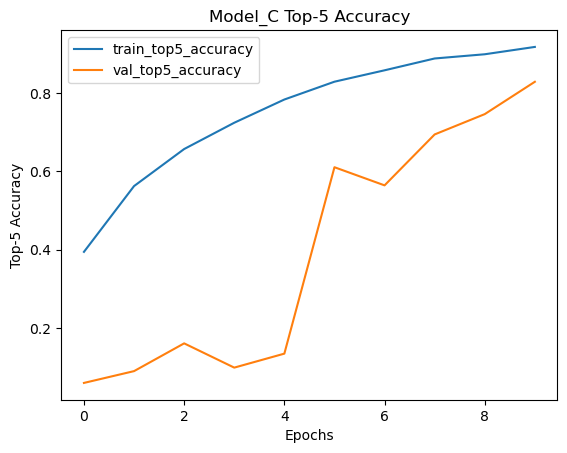

In [38]:
# Visualization Model_C learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_C Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_C Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_C Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()

In [35]:
# ResNet-50_D

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Conv2D, AveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\train'
val_data_dir = 'C:\\Users\\dssal\\OneDrive\\바탕 화면\\이원병\\val'

img_width, img_height = 224, 224
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output

# Modify 'downsampling' block

# Add 2x2 AveragePooling layer (stride=2)
x = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(x)

x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(512, (3, 3), strides=(2, 2), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
x = BatchNormalization()(x)

# The rest is the same as the base model
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

val_loss, top1_val_accuracy, top5_val_accuracy = model.evaluate(val_generator)

print("Top-1 Validation Accuracy:", top1_val_accuracy)
print("Top-5 Validation Accuracy:", top5_val_accuracy)

print(history.history)

Found 7316 images belonging to 102 classes.
Found 1828 images belonging to 102 classes.
Epoch 1/10
114/114 [==============================] - 272s 2s/step - loss: 2.5696 - accuracy: 0.4352 - top_k_categorical_accuracy: 0.6190 - val_loss: 18.4732 - val_accuracy: 0.0061 - val_top_k_categorical_accuracy: 0.0804
Epoch 2/10
114/114 [==============================] - 264s 2s/step - loss: 1.4932 - accuracy: 0.6145 - top_k_categorical_accuracy: 0.8274 - val_loss: 8.1461 - val_accuracy: 0.0541 - val_top_k_categorical_accuracy: 0.0865
Epoch 3/10
114/114 [==============================] - 264s 2s/step - loss: 1.0613 - accuracy: 0.7096 - top_k_categorical_accuracy: 0.9007 - val_loss: 6.5355 - val_accuracy: 0.0547 - val_top_k_categorical_accuracy: 0.1830
Epoch 4/10
114/114 [==============================] - 264s 2s/step - loss: 0.8087 - accuracy: 0.7696 - top_k_categorical_accuracy: 0.9374 - val_loss: 7.1761 - val_accuracy: 0.0335 - val_top_k_categorical_accuracy: 0.1105
Epoch 5/10
114/114 [=======

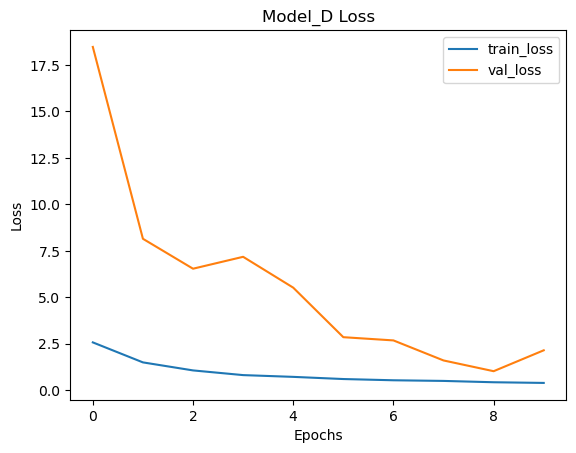

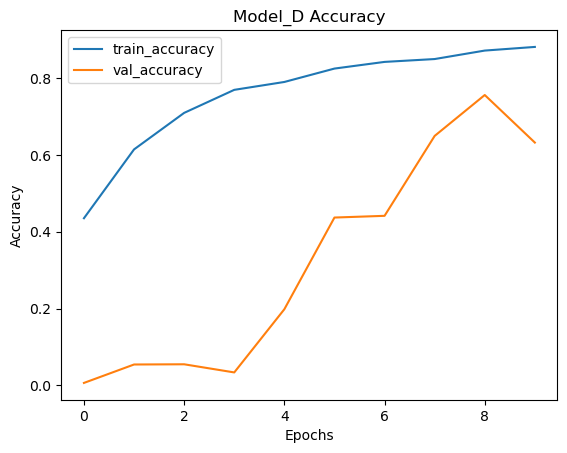

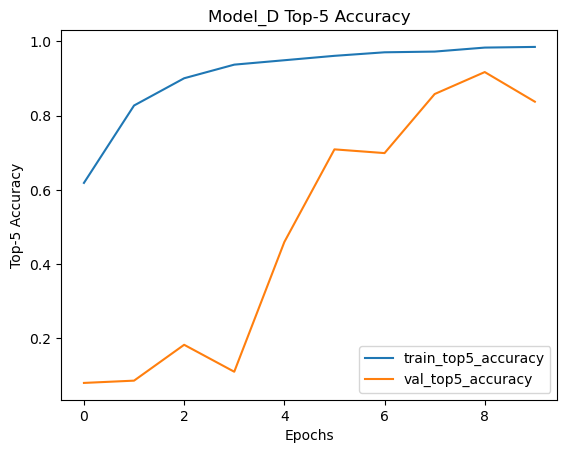

In [36]:
# Visualization Model_D learning log

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model_D Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model_D Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['top_k_categorical_accuracy'], label='train_top5_accuracy')
plt.plot(history.history['val_top_k_categorical_accuracy'], label='val_top5_accuracy')
plt.title('Model_D Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Top-5 Accuracy')
plt.legend()
plt.show()